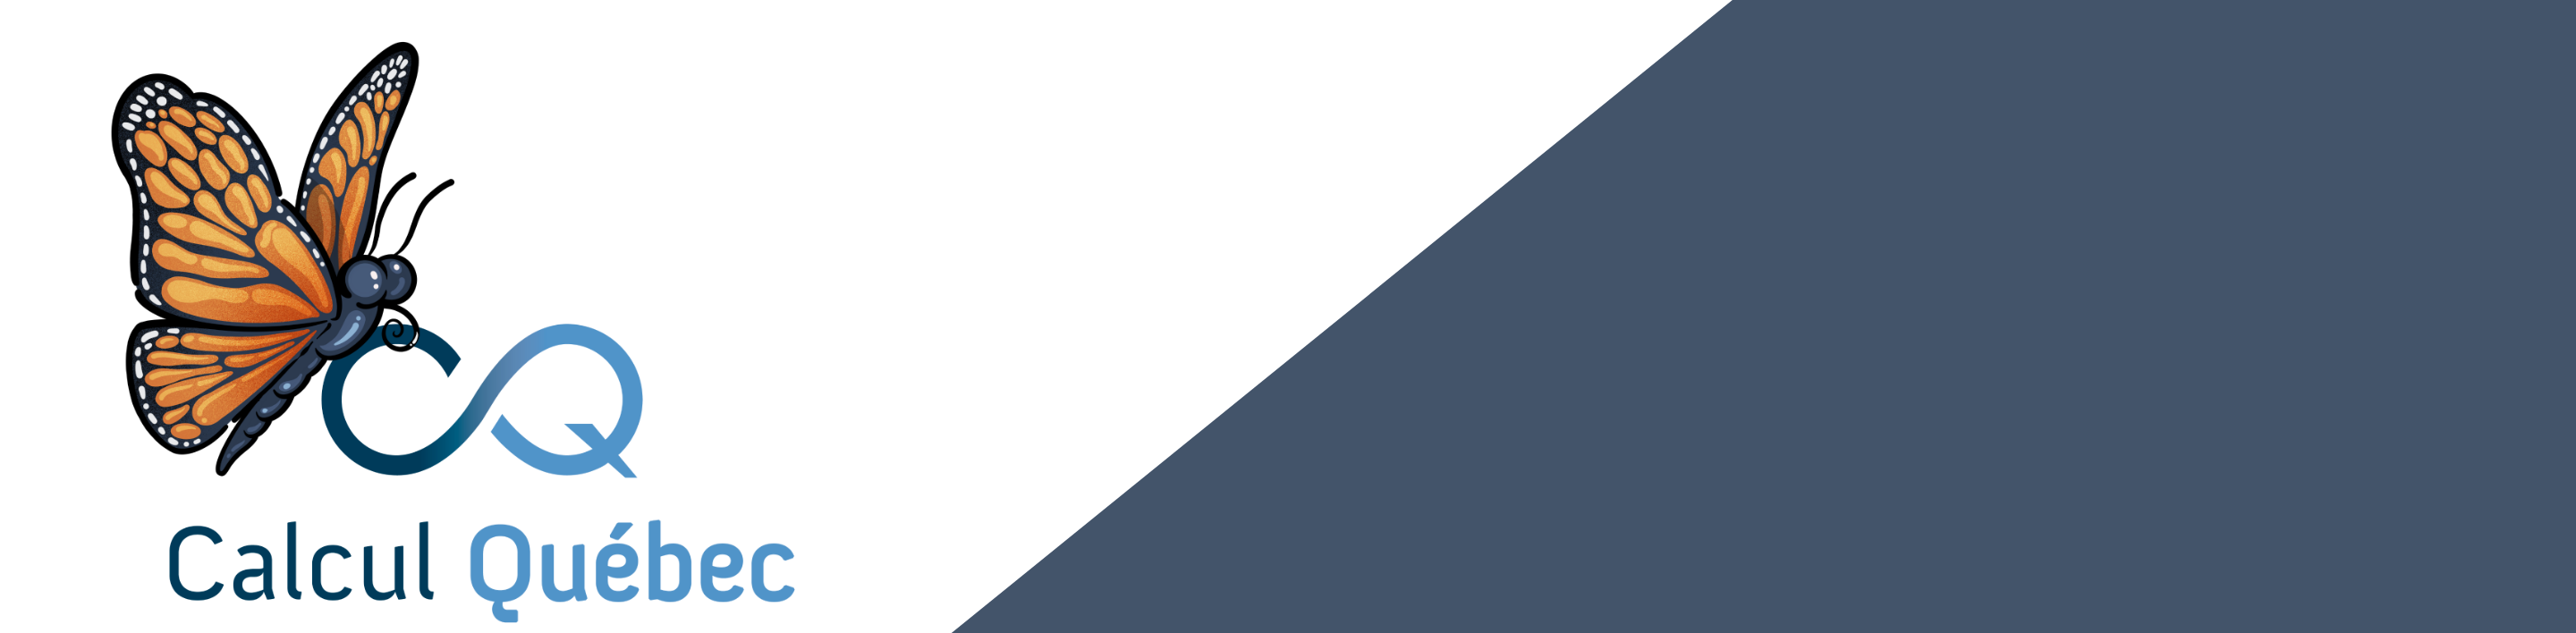

#### 0. Introduction

La nature fonctionne selon les principes de la **mécanique quantique**, et son cadre mathématique est fondé sur l'**algèbre linéaire**. Dans ce chapitre, nous allons nous plonger dans les concepts de base de l'information quantique en construisant un simulateur quantique d'un qubit entièrement basé sur des concepts simples d'algèbre linéaire.

Ce simulateur à petite échelle nous permettra de tout calculer exactement. Par contre, la simulation de systèmes quantiques devient infaisable au-delà d'environ 50 qubits, même avec des superordinateurs avancés comme Narval, ce qui met en évidence la puissance potentielle de l'informatique quantique.

In [1]:
import numpy as np
import sys
import os

# Ajouter le chemin du dossier parent à sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Maintenant tu peux importer autocorrecteur
from autocorrecteur.correction_1_simulateur_un_qubit import *

# 1. Initialiser le qubit
#### Qubits et notation Dirac
L'élément fondamental d'un ordinateur quantique est le **qubit**. Alors que dans MonarQ, les qubits sont physiquement implémentés avec des circuits d'atomes artificiels, ils sont mathématiquement représentés par des vecteurs appelés **vecteurs d'état**. Pour simplifier la représentation de ces vecteurs, nous utilisons la **notation de Dirac** (également connue sous le nom de **notation de bra-ket**).  

#### Ket: vecteur colonne
En notation Dirac, $\vert \cdot \rangle$ représente un **ket**, soit un vecteur colonne. Les deux états de la base de calcul d'un qubit s'écrivent comme suit : 
\begin{equation}
\vert 0 \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad 
\vert 1 \rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
\end{equation}

#### Bra: vecteur ligne
$\langle \cdot \vert$ représente le **bra**, soit le vecteur ligne correspondant au transposé du conjugué complexe d'un ket. Par exemple :
\begin{equation}
\langle 0 \vert = \begin{pmatrix} 1 & 0 \end{pmatrix}, \quad 
\langle 1 \vert = \begin{pmatrix} 0 & 1 \end{pmatrix}.
\end{equation}

In [3]:
#In Python, we can define vectors using numpy arrays
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])

#### Superposition : État de qubit arbitraire
L'état d'un qubit arbitraire peut être écrit sous forme de **combinaison linéaire** des états de la base de calcul $\vert 0 \rangle$ et $\vert 1 \rangle$:  
\begin{equation}
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle,
\end{equation}
où $\alpha$ et $\beta$ sont des nombres complexes satisfaisant $|\alpha|^2 + |\beta|^2 = 1$ (pour assurer la normalisation).  

Le **bra** correspondant à $\vert \psi \rangle$ est
\begin{equation}
\langle \psi \vert = \alpha^*   \langle0 \vert + \beta^* \langle1 \vert. 
\end{equation}

Ici, $\alpha^*$ et $\beta^*$ représentent les [conjugués complexes](https://en.wikipedia.org/wiki/Complex_conjugate) de $\alpha$ et $\beta$, respectivement. Cette combinaison linéaire permet au qubit d'exister en **superposition** des états $\vert 0 \rangle$ et $\vert 1 \rangle$, ce qui signifie qu'il peut représenter simultanément les deux états avec des probabilités déterminées par $\vert \alpha|^2$ et $\vert \beta|^2$. **Bien que les qubits soient dans une combinaison linéaire d'états, lors de la mesure du qubit, par exemple à la fin d'un algorithme, il ne sera seulement mesuré dans l'état $\vert 0 \rangle$ ou $\vert 1 \rangle$.**

#### Pourquoi la notation de Dirac ?  
La notation de Dirac offre un moyen compact de décrire et de manipuler mathématiquement les états quantiques. Elle simplifie l'expression d'opérations telles que  
- **Produits scalaires:** $\langle \phi | \psi \rangle$ (mesure du chevauchement entre les états).  
- **Produits tensoriels:** $\vert \psi \rangle \langle \phi \vert$ (représentant les opérateurs quantiques).  

EXERCICE #1

---

Complétez la fonction `qubit_state(alpha, beta)` pour créer un état quantique arbitraire avec les coefficients $\alpha$ et $\beta$. 

In [4]:
def qubit_state(alpha, beta):
    """
    Crée un état de qubit |ψ⟩ selon les coefficients alpha et beta.
    
    Args:
        alpha (complex): Amplitude de |0⟩
        beta (complex): Amplitude de |1⟩
        
    Returns:
       numpy.ndarray: Le vecteur d’état |ψ⟩
    """
    # Définir les états de base |0⟩ et |1⟩
    ket_0 = np.array([1, 0])# Complétez cette ligne 
    ket_1 = np.array([0, 1])# Complétez cette ligne 
    
    # Construire l'état |ψ⟩
    psi = alpha*ket_0 + beta*ket_1 # Complétez cette ligne 

    # Retourner l'état 
    return psi

In [5]:
# Tester avec alpha = 1/2 et beta = sqrt(3)/2 * i
alpha_test = 1/2.0
beta_test = np.sqrt(3)/2 * 1j

psi = qubit_state(alpha_test, beta_test)
print("État |ψ⟩ :", psi)
correction_exercice1(psi)

État |ψ⟩ : [0.5+0.j        0. +0.8660254j]


EXERCICE #2 (Optionnel)

---

Complétez la fonction `is_normalized(state)` pour vérifier qu'un état arbitraire est normalisé, soit que $|\alpha|^2 + |\beta|^2 = 1$. Le module au carré est défini comme suit $|\alpha|^2  = \alpha\alpha^*$ et $|\beta|^2  = \beta\beta^*$ où $*$ représente le conjugué complexe. Indice : Utilisez la fonction `np.conj()`.

In [6]:
def is_normalized(state):  
    """Vérifie si un état est normalisé .  

    Args:  
        state (np.array): État du qubit (vecteur de dimension 2)

    Returns:  
        Bool: True si le vecteur est normalisé, False autrement.  
    """  
    norm = np.conj(state[0])*state[0] + np.conj(state[1])*state[1] # Complétez cette ligne  
    return np.isclose(norm, 1)   

In [7]:
# Test de la fonction  
alpha = 1/2  
beta = np.sqrt(3)/2 * 1j  
psi = qubit_state(alpha, beta)  
is_norm = is_normalized(psi)

print("État quantique :", psi)  
print("Normalisé :", is_norm) 
correction_exercice2(is_norm)

État quantique : [0.5+0.j        0. +0.8660254j]
Normalisé : True


### Sphère de Bloch
Pour visualiser géométriquement les états d'un qubit, nous utilisons la **sphère de Bloch**. Tout état (pur) peut être représenté comme un point sur la surface de la sphère, défini par deux angles.

$\theta$ : Spécifie l'angle entre l'état et l'axe $\vert{0} \rangle$.

$\phi$ : Spécifie la rotation autour de l'axe z. 

Par exemple, $\vert 0 \rangle$ est le pôle nord ($\theta = 0$) tandis que $\vert 1 \rangle$ est le pôle sud ($\theta = \pi$). 

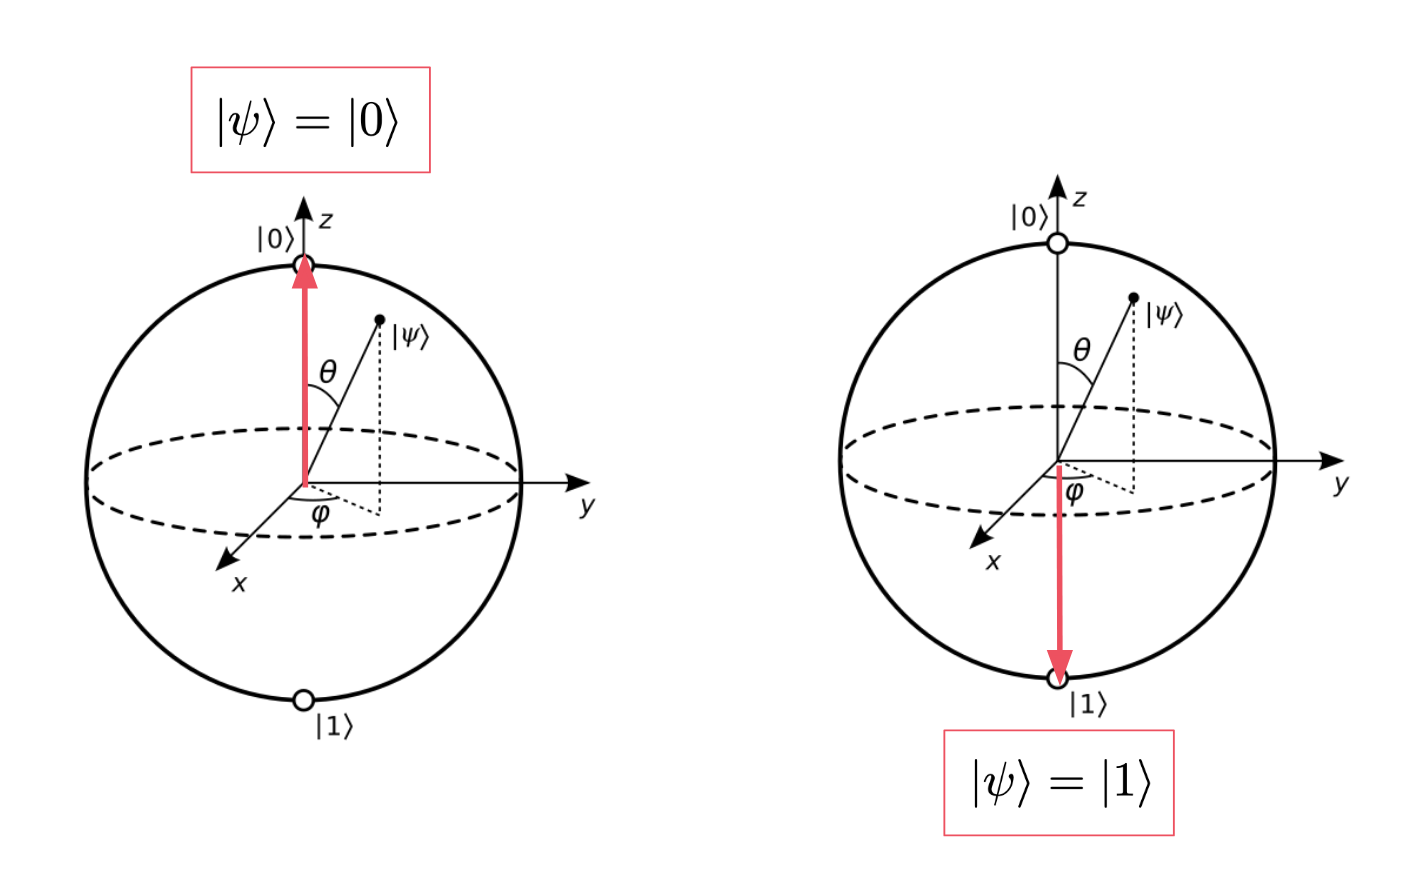

Une superposition générale se trouve quelque part sur la surface de la sphère. Par exemple,

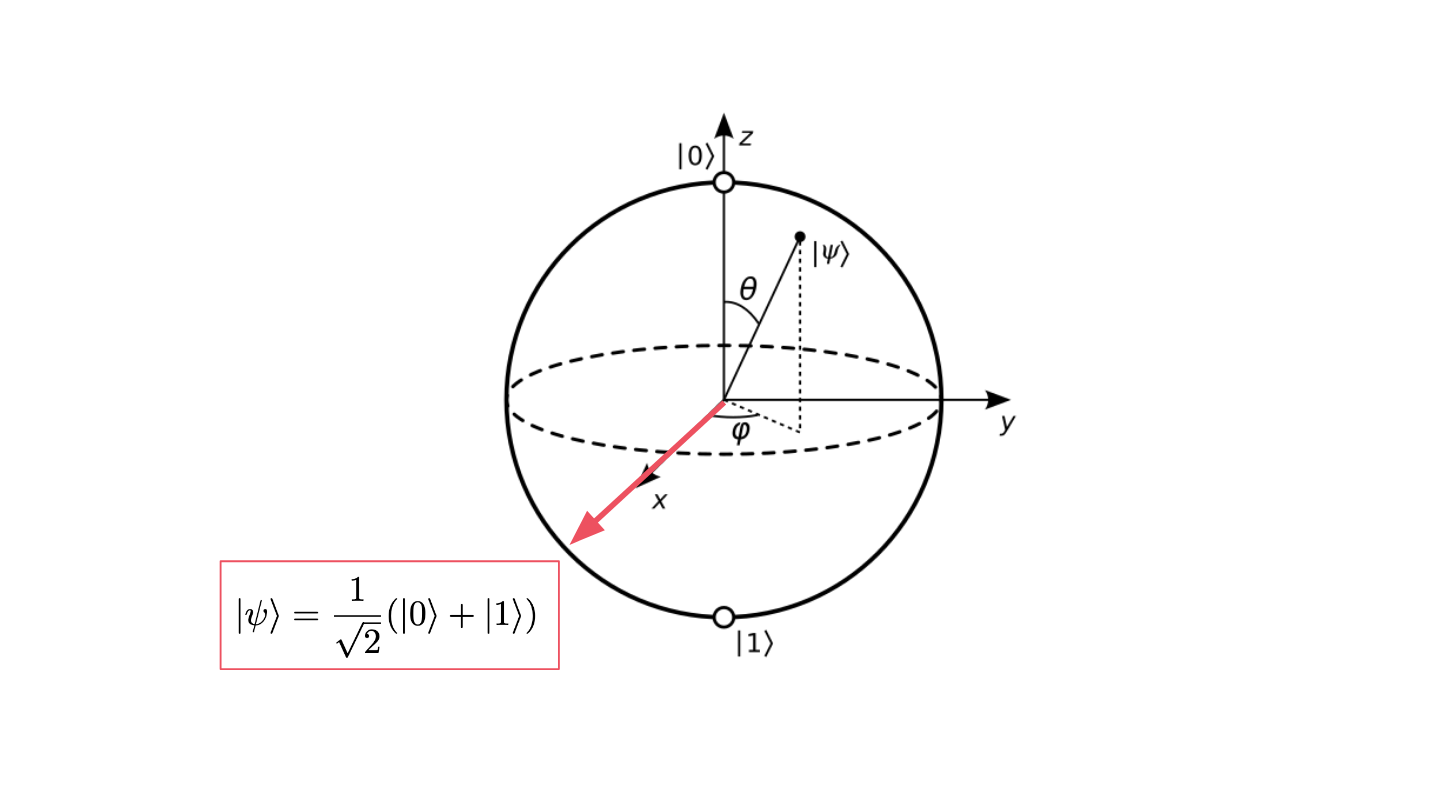

# 2. Opérations

Que pouvons-nous faire avec un qubit?  

L'un des outils les plus importants de l'informatique quantique est la possibilité d'appliquer des **opérations** sur les qubits. Ces opérations sont représentées par des **matrices** qui modifient l'état des qubits, les déplaçant ainsi dans la sphère de Bloch.  

EXERCICE #3

---
Complétez la fonction `apply_U(state, U)` en appliquant une matrice unitaire $U$ à un qubit dans un état arbitraire. Vous pouvez utiliser [`np.dot()`](https://numpy.org/doc/2.1/reference/generated/numpy.dot.html) pour effectuer le produit scalaire entre deux vecteurs.

In [8]:
def apply_U(state, U):
    """
    Applique une porte quantique (matrice unitaire) à un état de qubit donné.
    
    Args:
        state (np.array): État du qubit (vecteur de dimension 2)
        U (np.array): Matrice unitaire 2x2 
        
    Returns:
        np.array: Nouvel état du qubit après l'application de la matrice U 
    """
    # Appliquer la matrice U au qubit 
    return np.dot(state, U)# Complétez cette ligne 

Nous allons tester la fonction `apply_U(state, U)` avec une matrice unitaire particulièrement importante nommée la matrice de Hadamard

\begin{equation}
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 
1 & 1 \\ 
1 & -1 
\end{pmatrix}.
\end{equation} 


Nous allons appliquer la matrice $H$ à l'état $\vert \psi \rangle = \vert 0 \rangle$. Initialement, l'état $\vert \psi \rangle$ n'est **pas en superposition**. Il pointe directement vers le haut de la sphère de Bloch. Que se passe-t-il après application de la matrice $H$?

In [9]:
# Définir la matrice de Hadamard
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

# Tester la fonction avec |0⟩ et H
ket_0 = np.array([1, 0])
new_ket = apply_U(ket_0, H)
print("Nouvel état après application de H :", new_ket)
correction_exercice3(new_ket)

Nouvel état après application de H : [0.70710678 0.70710678]


Pour afficher le nouveau vecteur d'état en notation de Dirac, utilisez la fonction `print_state_vector()` comme ci-dessous. 

In [10]:
from print_latex import print_state_vector

print_state_vector(new_ket)

$$\left|\psi\right\rangle = (0.707107) \left|{0}\right\rangle + (0.707107) \left|{1}\right\rangle$$

Mathématiquement, voici l'opération que nous avons effectuée,
\begin{equation}
H \vert 0 \rangle  = \frac{1}{\sqrt{2}}\begin{pmatrix} 
1 & 1\\
1 & -1
\end{pmatrix}\begin{pmatrix} 1 \\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\1\end{pmatrix}  = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle).
\end{equation}

Graphiquement, on visualise le changement de l'état du qubit sur la sphère de Bloch.
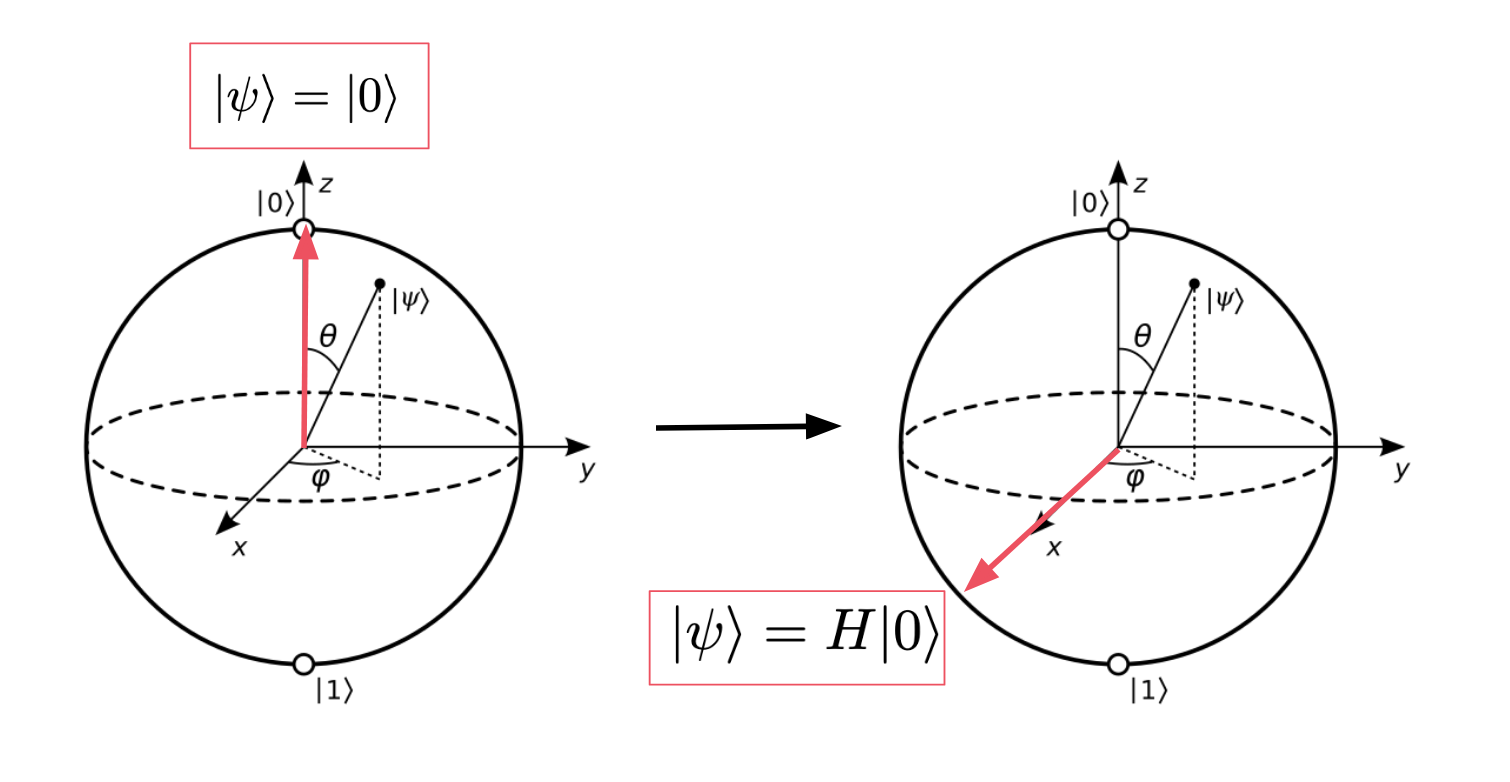

Nous avons créé un état de superposition en appliquant une matrice judicieusement sélectionnée à l'état initial de notre qubit. Il s'agit d'une matrice spéciale en informatique quantique appelée la **porte de Hadamard**. Nous en parlerons plus en détail dans le prochain chapitre. 

Multiplier des vecteurs par des matrices peut sembler une action abstraite, mais dans les ordinateurs physiques comme MonarQ, elle est réalisée en envoyant des impulsions précises aux qubits. Cependant, lorsqu'on utilise un ordinateur quantique comme MonarQ, cette complexité est gérée en coulisses. Pour les utilisateurs, il n'est pas nécessaire de penser aux impulsions et nous nous contenterons de considérer de simples commandes (portes quantiques), ce qui permettra de se concentrer sur la construction et l'exécution d'algorithmes quantiques.

### Amplitudes de probabilité

Considérons une superposition générale,
\begin{equation}
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle.
\end{equation}

Lorsque nous mesurons le qubit dans l'état $\vert \psi \rangle$, il s'effondre dans l'un des états de base. La probabilité de mesurer $\vert 0 \rangle$ est donnée par $\vert \alpha \vert^2$, et la probabilité de mesurer $\vert 1 \rangle$ est $\vert \beta \vert^2$. Ces probabilités sont déterminées par le module au carré, dénoté $| \cdot |^2$, des coefficients complexes $\alpha$ et $\beta$, que nous appelons **amplitudes de probabilité**.  

\begin{equation}
P(\vert 0 \rangle) = \vert \alpha \vert ^2 = \alpha^* \alpha 
\end{equation}

\begin{equation}
P(\vert 1 \rangle) = \vert \beta \vert ^2 = \beta^* \beta
\end{equation}

Rappelons que $\alpha$ et $\beta$ sont des nombres complexes satisfaisant $|\alpha|^2 + |\beta|^2 = 1$. La probabilité totale est donc conservée, $P(\vert 0 \rangle) + P(\vert 1 \rangle) = 1$.

EXERCICE #4

---
Complétez la fonction `measurement_probabilities(state)` pour calculer les probabilités de mesurer $\vert 0 \rangle$ et $\vert 1 \rangle$ pour un état $\vert \psi \rangle$ arbitraire.  
Indice : Utilisez la fonction `np.conj()`.

In [11]:
def measurement_probabilities(state):  
    """Calcule les probabilités de mesurer |0⟩ et |1⟩ à partir d’un état quantique donné.  

    Args:  
        state (np.array): Vecteur représentant l’état du qubit.  

    Returns:  
        tuple: Probabilités (P0, P1) correspondant aux mesures |0⟩ et |1⟩.  
    """  
    P0 = np.conj(state[0])*state[0] # Complétez cette ligne 
    P1 = np.conj(state[1])*state[1]# Complétez cette ligne 
    return P0, P1  

Testons la fonction `measurement_probabilities(state)` avec l'état de superposition créé dans le dernier exercice, 

\begin{equation}
\vert \psi \rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle).
\end{equation}

In [12]:
# Définition de l’état de superposition  
psi = (1 / np.sqrt(2)) * np.array([1, 1])  

# Test de la fonction  
P0, P1 = measurement_probabilities(psi)  
print(P0, P1)  
correction_exercice4([P0, P1])

0.4999999999999999 0.4999999999999999


Les coefficients $\alpha$ et $\beta$ déterminent les probabilités de mesurer $\vert 0 \rangle$ ou $\vert 1 \rangle$ après une mesure. Par exemple, si $\vert \psi \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle$, la mesure donnera $\vert 0 \rangle$ 50% du temps et $\vert 1 \rangle$ 50 % du temps.  

Cette nature probabiliste de la mesure est une caractéristique fondamentale de l'informatique quantique. Contrairement à l'informatique classique, où les calculs sont déterministes, les mesures quantiques produisent des résultats en fonction de la **distribution de probabilités** encodée dans l'état quantique. Cela signifie que l'exécution d'un même calcul quantique plusieurs fois peut produire des résultats différents, en fonction des probabilités associées à l'état.

Pour simuler ce comportement, nous devons générer des échantillons à partir de la distribution de probabilité de l'état quantique. Ce processus probabiliste est la dernière étape nécessaire à la construction d'un simple simulateur quantique! Mettons cette idée en pratique en simulant des mesures à partir d'un état quantique donné.  

EXERCICE #5

---

Complétez la fonction `simulate_measurements(probs, num_samples)` pour simuler 1000 mesures d'un état quantique. Utilisez la fonction [np.random.choice()](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.choice.html) pour échantillonner selon une distribution de probabilité donnée.

In [13]:
def simulate_measurements(probs, num_samples = 1000):  
    """Simule des mesures quantiques en échantillonnant la distribution de probabilité d’un état quantique.  

    Args:  
        probs (tuple): Probabilités de mesurer |0⟩ et |1⟩.  
        num_samples (int): Nombre de mesures à simuler.  

    Returns:  
        dict: Nombre d’occurrences de chaque résultat (0 ou 1).  
    """  
    results = np.random.choice([0,1], p = probs, size = 1000)# Complétez cette ligne  
    
    return dict(zip(*np.unique(results, return_counts=True)))  

# Probabilités obtenues précédemment  
probs = (P0, P1)  

# Test de la fonction  
measurement_results = simulate_measurements(probs)  
print(measurement_results)  
correction_exercice5(measurement_results)

{0: 507, 1: 493}


Félicitations ! Vous avez simulé un ordinateur quantique à un qubit. En partant de l'état initial $\vert 0 \rangle$, vous avez appliqué une opération (la porte de Hadamard) pour transformer l'état en une superposition. Enfin, vous avez simulé 1000 mesures ('shots' ou 'tirs') du circuit et analysé les résultats.  

Il s'agit d'un exemple simple avec **un** seul qubit. Cependant, les systèmes quantiques réels deviennent beaucoup plus complexes lorsque l'on passe à **plusieurs qubits**, notamment parce que les qubits peuvent être **intriqués**, un phénomène exclusivement quantique. Dans le prochain chapitre, nous explorerons les circuits quantiques plus en détail. 

Le circuit quantique à qubit unique que nous avons implémenté est représenté ci-dessous dans un schéma de circuit.

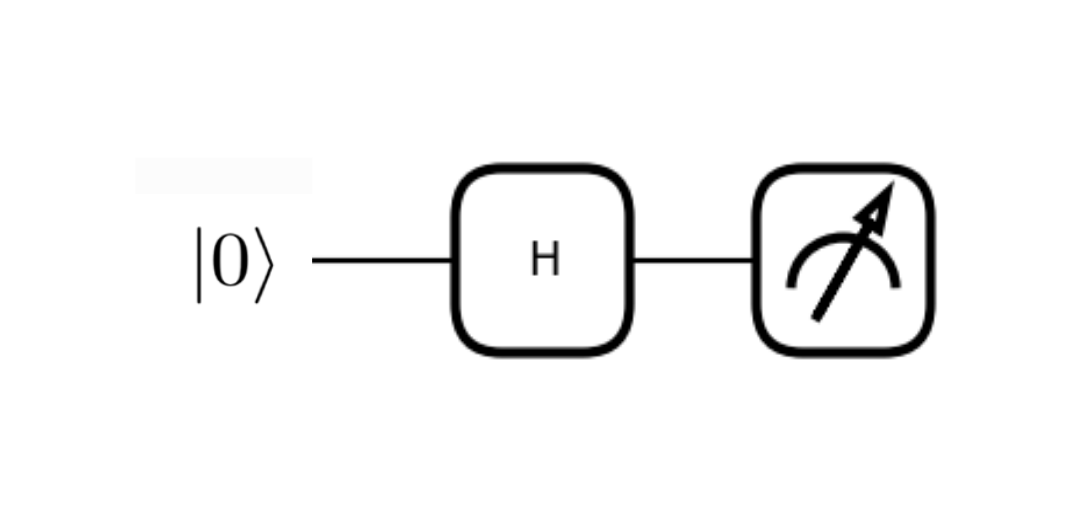

### Réferences

Ce notebook est adapté de [`Introduction to Quantum Computing: All About Qubits.`](https://pennylane.ai/codebook/introduction-to-quantum-computing/all-about-qubits) 